### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [2]:
# Imports
!pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [3]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(reviews.columns)
print(reviews.shape)
print(reviews.head())
print(reviews.tail())

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
(2000, 11)
   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a 

In [4]:
# Any missing values?
print(reviews.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [5]:
# Explore the data.
print(reviews.dtypes)

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [6]:
# Descriptive statistics.
print(reviews.describe())
print(reviews.info())

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 199

## 2. Drop columns

In [7]:
# Drop unnecessary columns.
reviews = reviews.drop(columns=['language', 'platform'])

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [8]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'renumeration', 'spending_score (1-100)': 'spending_score'})

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
df = pd.DataFrame(reviews)
df.to_csv('reviews.csv', index=False)

In [10]:
# Import new CSV file with Pandas.
df = pd.read_csv('reviews.csv')

# View DataFrame.
print(df.columns)
print(df.shape)
print(df.head())
print(df.tail())

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')
(2000, 9)
   gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

   

## 5. Linear regression

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        20:38:27   Log-Likelihood:                -8759.4
No. Observations:                2000   AIC:                         1.752e+04
Df Residuals:                    1998   BIC:                         1.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4260      0.685     41.504      0.000      27.083      29.769
x              0.0137      0.000     40.595      0.000       0.013       0.014
==============================================================================
Omnibus:                      169.397   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.607
Skew:                           0.768   Prob(JB):                     6.81e-47
Kurtosis:                       3.441   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

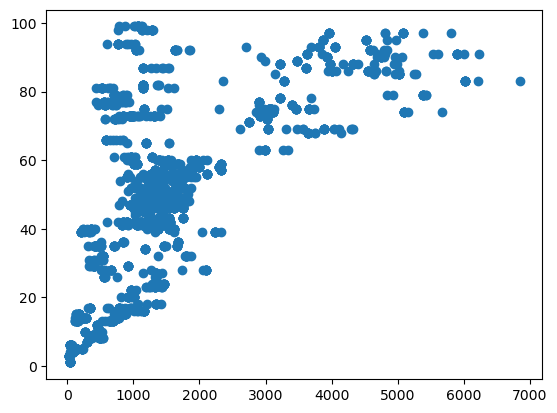

In [11]:
df.corr()
# Independent variable.
y = df['spending_score'] 

# Dependent variable.
x = df['loyalty_points']

# OLS model and summary.
plt.scatter(x, y)
f = 'y ~ x'
test = ols(f, data = df).fit()
test.summary()

In [12]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    28.426033
x             0.013671
dtype: float64
Standard errors:  Intercept    0.684905
x            0.000337
dtype: float64
Predicted values:  [ 31.29703545  35.58986696  28.97289101 ... 105.17748592  42.75370042
  34.97465225]


In [13]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (28.4260) + 0.0137 * df['loyalty_points']

# View the output.
y_pred

0        31.3030
1        35.6048
2        28.9740
3        36.1254
4        33.4402
          ...   
1995     83.6507
1996     35.8103
1997    105.3378
1998     42.7836
1999     34.9883
Name: loyalty_points, Length: 2000, dtype: float64

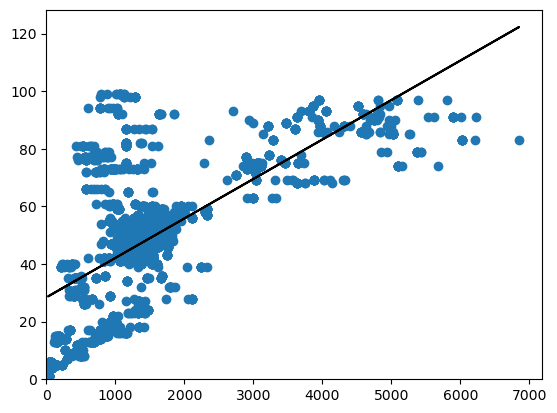

In [14]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the . Thx and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      q   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        20:38:28   Log-Likelihood:                -8641.8
No. Observations:                2000   AIC:                         1.729e+04
Df Residuals:                    1998   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5606      0.646     47.321      0.000      29.294      31.827
p              0.0111      0.000     34.960      0.000       0.010       0.012
==============================================================================
Omnibus:                      382.801   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.257
Skew:                           1.230   Prob(JB):                    1.90e-143
Kurtosis:                       4.357   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

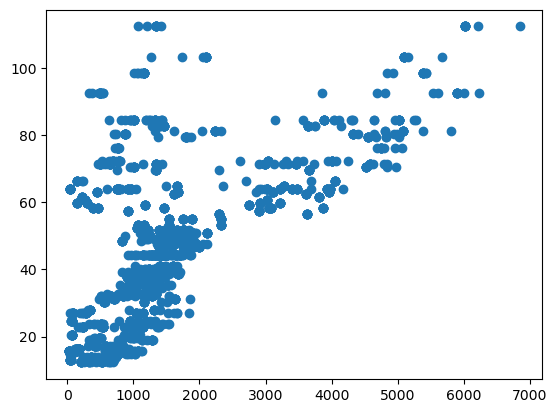

In [15]:
# Independent variable.
q = df['renumeration'] 

# Dependent variable.
p = df['loyalty_points']

# OLS model and summary.
plt.scatter(p, q)
e = 'q ~ p'
test_1 = ols(e, data = df).fit()
test_1.summary()

In [16]:
# Extract the estimated parameters.
print("Parameters: ", test_1.params) 

# Extract the standard errors.
print("Standard errors: ", test_1.bse)  

# Extract the predicted values.
print("Predicted values: ", test_1.predict())

Parameters:  Intercept    30.560555
p             0.011101
dtype: float64
Standard errors:  Intercept    0.645817
p            0.000318
dtype: float64
Predicted values:  [32.89186761 36.3777352  31.00461446 ... 92.88431491 42.19491551
 35.87816819]


In [17]:
# Set the the X coefficient and the constant to generate the regression table.
q_pred = (30.5606) + 0.0111 * df['loyalty_points']

# View the output.
q_pred

0       32.8916
1       36.3770
2       31.0046
3       36.7988
4       34.6232
         ...   
1995    75.3047
1996    36.5435
1997    92.8760
1998    42.1934
1999    35.8775
Name: loyalty_points, Length: 2000, dtype: float64

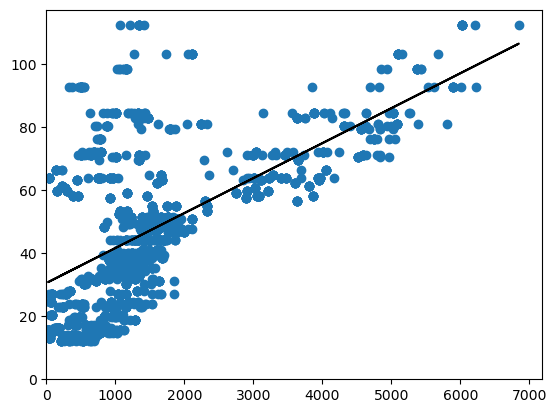

In [18]:
# Plot graph with regression line.
plt.scatter(p, q)

# Plot the regression line (in black).
plt.plot(p, q_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      t   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Tue, 31 Oct 2023   Prob (F-statistic):             0.0577
Time:                        20:38:32   Log-Likelihood:                -8051.8
No. Observations:                2000   AIC:                         1.611e+04
Df Residuals:                    1998   BIC:                         1.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2035      0.481     83.615      0.000      39.261      41.146
s             -0.0004      0.000     -1.899      0.058      -0.001    1.47e-05
==============================================================================
Omnibus:                       99.357   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.564
Skew:                           0.574   Prob(JB):                     3.61e-25
Kurtosis:                       2.814   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

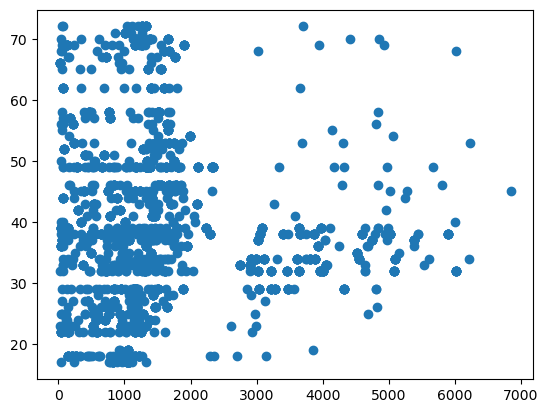

In [19]:
# Independent variable.
t = df['age'] 

# Dependent variable.
s = df['loyalty_points']

# OLS model and summary.
plt.scatter(s, t)
d = 't ~ s'
test_2 = ols(d, data = df).fit()
test_2.summary()

In [20]:
# Extract the estimated parameters.
print("Parameters: ", test_2.params) 

# Extract the standard errors.
print("Standard errors: ", test_2.bse)  

# Extract the predicted values.
print("Predicted values: ", test_2.predict())


Parameters:  Intercept    40.203457
s            -0.000449
dtype: float64
Standard errors:  Intercept    0.480816
s            0.000236
dtype: float64
Predicted values:  [40.10917768 39.96820745 40.18549915 ... 37.683053   39.73295776
 39.98841019]


In [21]:
# Set the X coefficient and the constant to generate the regression table.
t_pred = (40.2035) - 0.0004 * df['loyalty_points']

# View the output.
t_pred

0       40.1195
1       39.9939
2       40.1875
3       39.9787
4       40.0571
         ...   
1995    38.5911
1996    39.9879
1997    37.9579
1998    39.7843
1999    40.0119
Name: loyalty_points, Length: 2000, dtype: float64

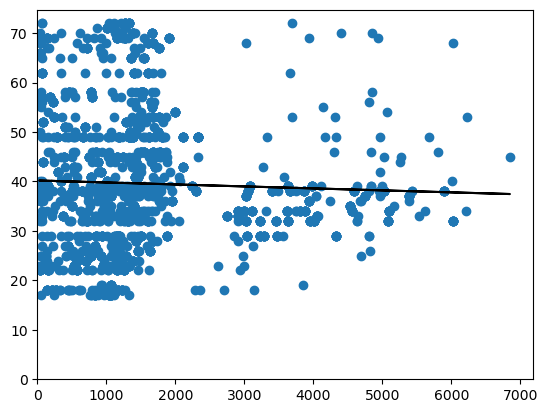

In [22]:
# Plot graph with regression line.
plt.scatter(s, t)

# Plot the regression line (in black).
plt.plot(s, t_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [23]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews.csv')

# View DataFrame.
print(df2.columns)
print(df2.shape)
print(df2.head())
print(df2.tail())


Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')
(2000, 9)
   gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

   

In [25]:
# Drop unnecessary columns.


# View DataFrame.


In [26]:
# Explore the data.
print(df2.dtypes)

gender             object
age                 int64
renumeration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


In [27]:
# Descriptive statistics.
print(df2.describe())
print(df2.info())

               age  renumeration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000     12.300000        1.000000       25.000000    107.000000
25%      29.000000     30.340000       32.000000      772.000000   1589.250000
50%      38.000000     47.150000       50.000000     1276.000000   3624.000000
75%      49.000000     63.960000       73.000000     1751.250000   6654.000000
max      72.000000    112.340000       99.000000     6847.000000  11086.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2 

## 2. Plot

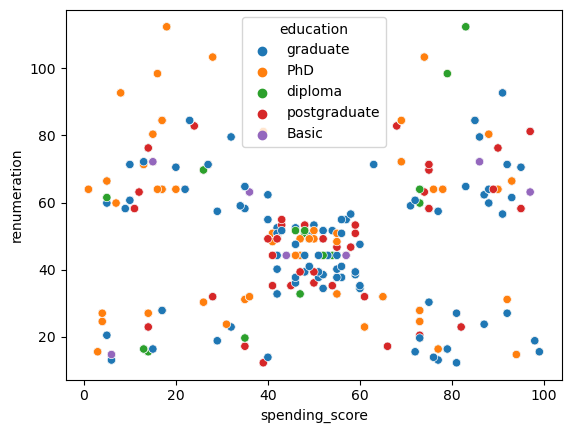

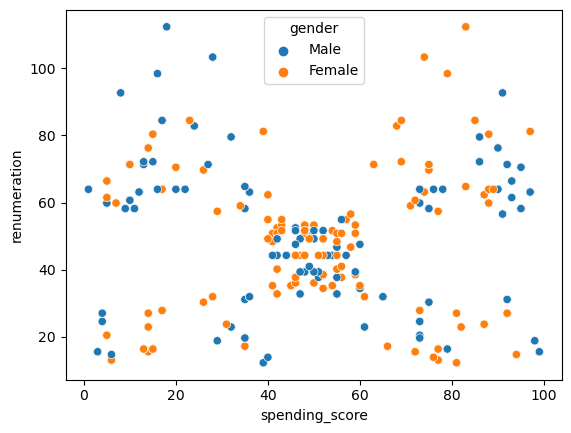

In [28]:
# Create a scatterplot with Seaborn.

Scatt_Edu = sns.scatterplot(data=df2, x="spending_score", y="renumeration", hue='education')
plt.show(Scatt_Edu)
Scatt_Gen = sns.scatterplot(data=df2, x="spending_score", y="renumeration", hue='gender')
plt.show(Scatt_Gen)

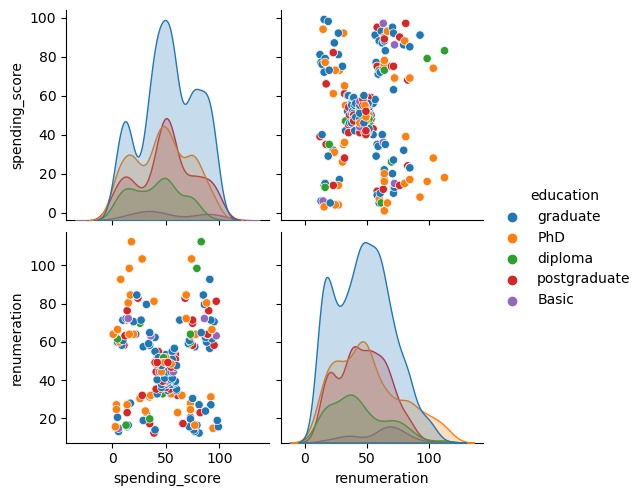

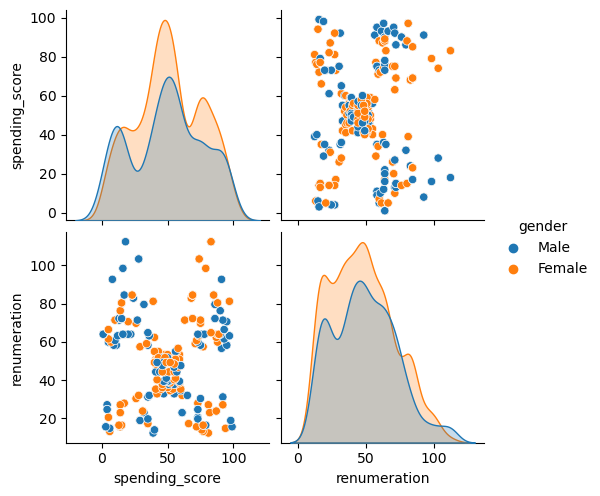

In [29]:
# Create a pairplot with Seaborn.
x = df2[["spending_score", "renumeration"]]
Pair_Edu = sns.pairplot(data=df2,  vars=x, hue='education')
plt.show(Pair_Edu)
Pair_Gen = sns.pairplot(data=df2,  vars=x, hue='gender')
plt.show(Pair_Gen)

## 3. Elbow and silhoutte methods

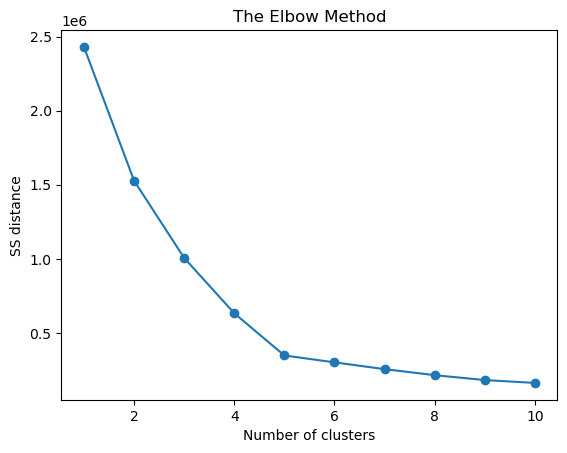

In [30]:
# Determine the number of clusters: Elbow method.

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

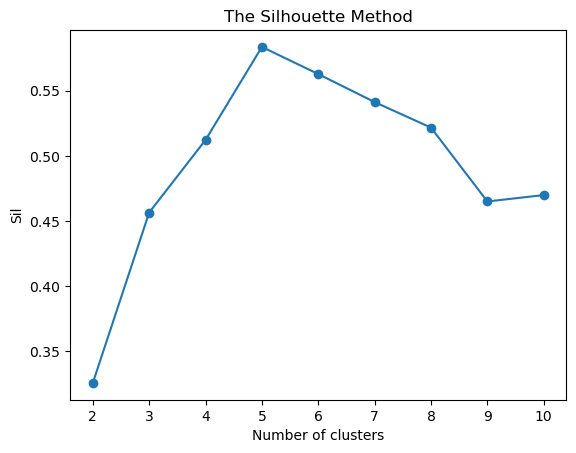

In [31]:
# Determine the number of clusters: Silhouette method.

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  1
2               6         13.12                  1
3              77         13.12                  1
4              40         13.94                  1


1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

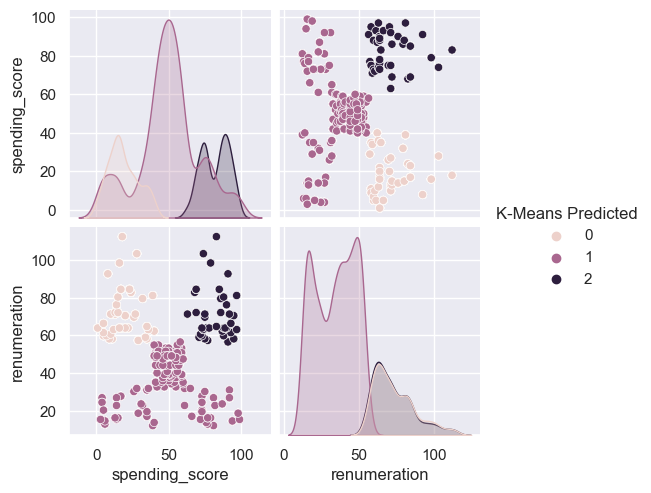

In [173]:
# Use three clusters.
a = x
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(a)

clusters = kmeans.labels_

a['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(a,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
a['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(a.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
a['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

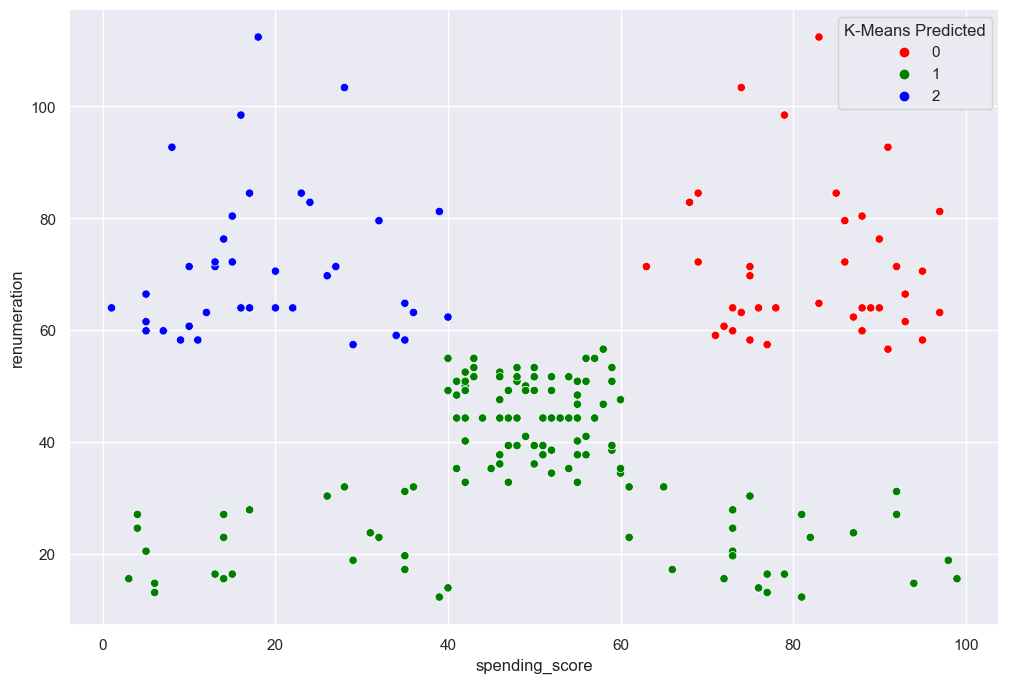

In [172]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=a,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  0
2               6         13.12                  1
3              77         13.12                  0
4              40         13.94                  1


0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

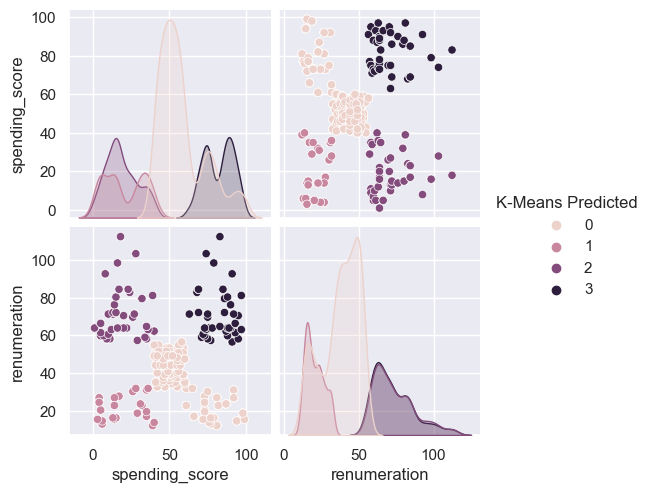

In [174]:
# Use four clusters.
b = x
kmeans_1 = KMeans(n_clusters=4,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(b)

clusters_1 = kmeans_1.labels_

b['K-Means Predicted'] = clusters_1
# Plot the predicted.
sns.pairplot(b,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
b['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(b.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
b['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

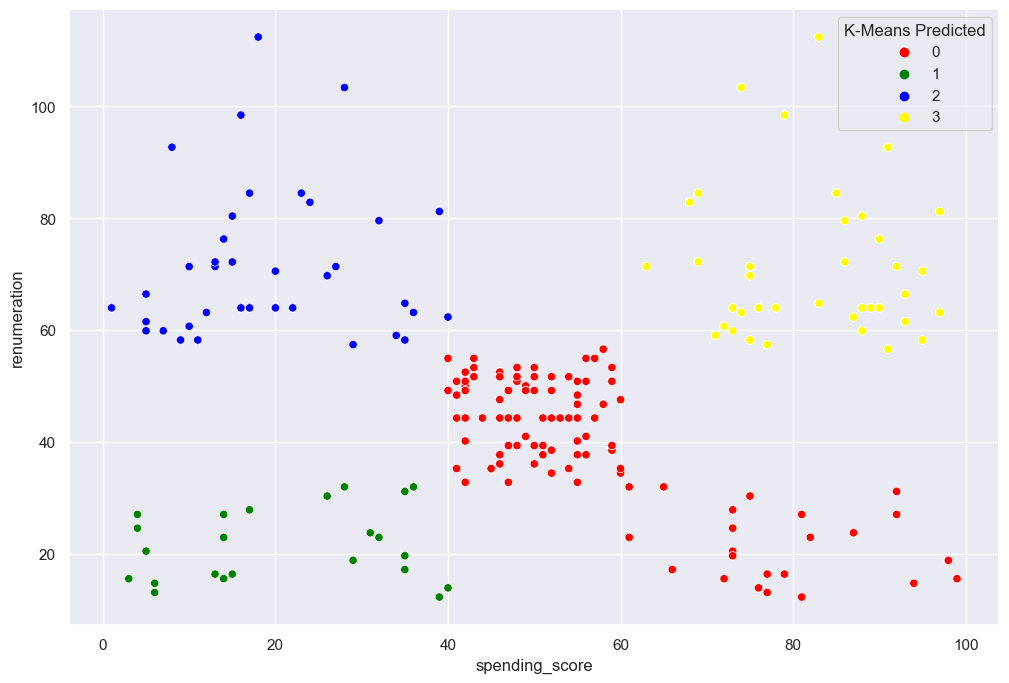

In [175]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=b,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  4
2               6         13.12                  1
3              77         13.12                  4
4              40         13.94                  1


0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

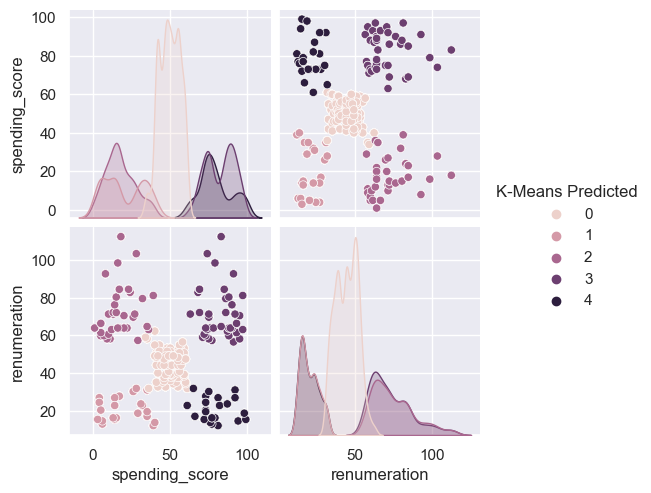

In [176]:
# Use five clusters.
c = x
kmeans_2 = KMeans(n_clusters=5,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(c)

clusters_2 = kmeans_2.labels_

c['K-Means Predicted'] = clusters_2
# Plot the predicted.
sns.pairplot(c,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
c['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(c.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
c['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

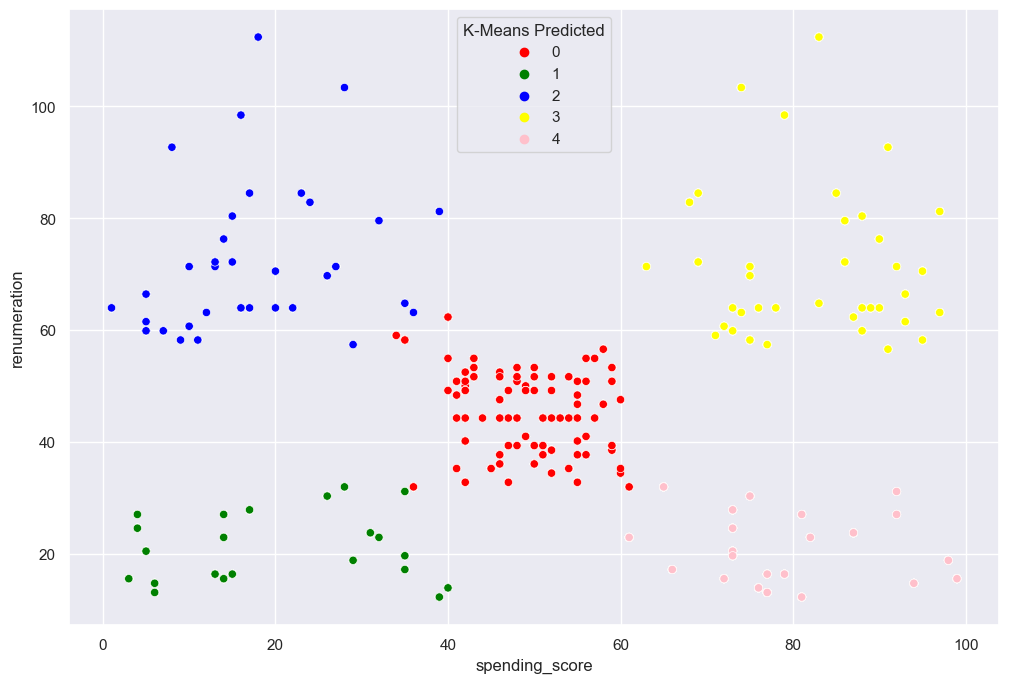

In [177]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=c,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  3
1              81         12.30                  5
2               6         13.12                  3
3              77         13.12                  5
4              40         13.94                  3


0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

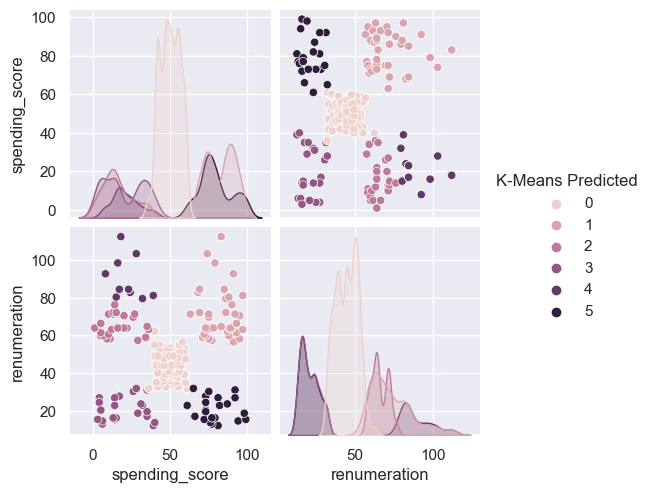

In [178]:
# Use six clusters.
d = x
kmeans_3 = KMeans(n_clusters=6,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(d)

clusters_3 = kmeans_3.labels_

d['K-Means Predicted'] = clusters_3
# Plot the predicted.
sns.pairplot(d,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
d['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(d.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
d['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

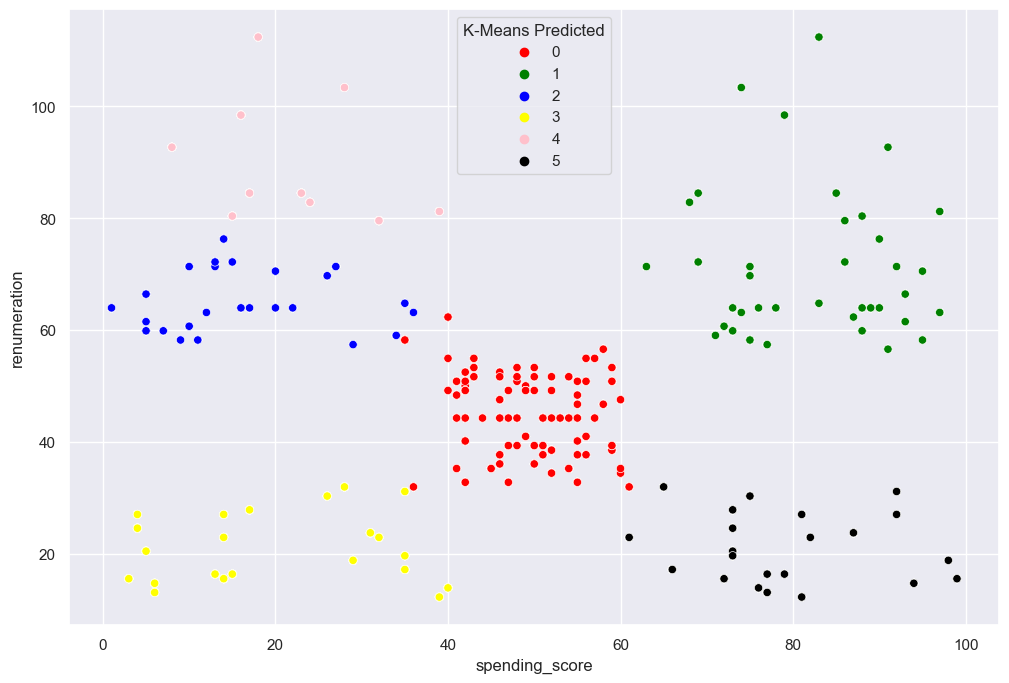

In [179]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=d,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink', 'black'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  3
1              81         12.30                  6
2               6         13.12                  3
3              77         13.12                  6
4              40         13.94                  3


2    767
3    271
4    271
6    269
1    214
5    123
0     85
Name: K-Means Predicted, dtype: int64

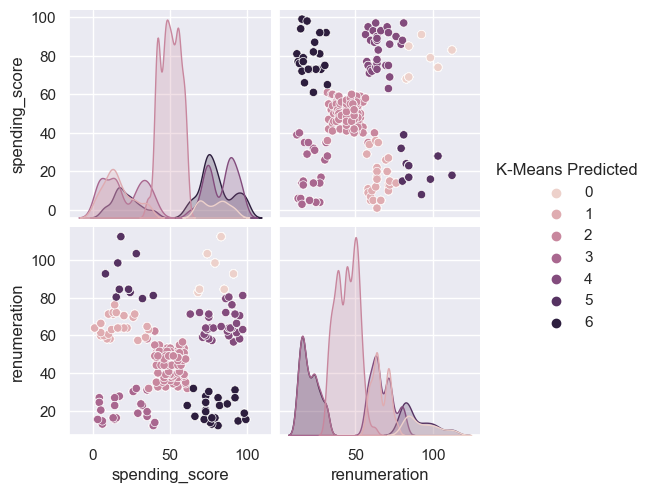

In [180]:
# Use seven clusters.
e = x
kmeans_4 = KMeans(n_clusters=7,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(e)

clusters_4 = kmeans_4.labels_

e['K-Means Predicted'] = clusters_4
# Plot the predicted.
sns.pairplot(e,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
e['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(e.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
e['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

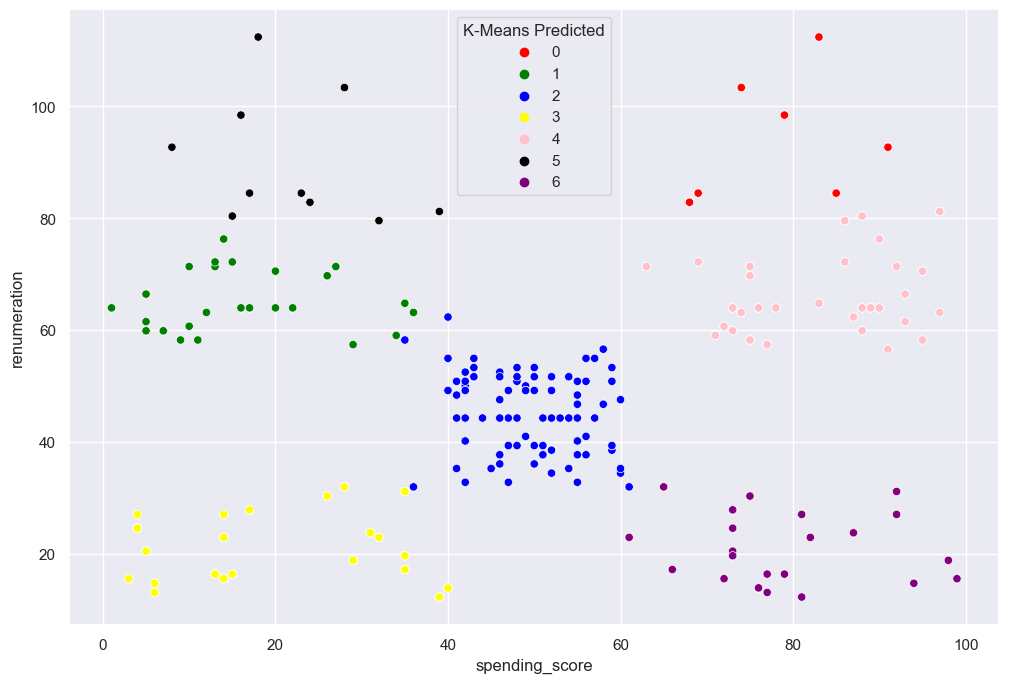

In [181]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=e,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink', 'black', 'purple'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  7
1              81         12.30                  1
2               6         13.12                  4
3              77         13.12                  1
4              40         13.94                  7


0    728
1    269
6    238
5    214
7    156
4    154
3    123
2    118
Name: K-Means Predicted, dtype: int64

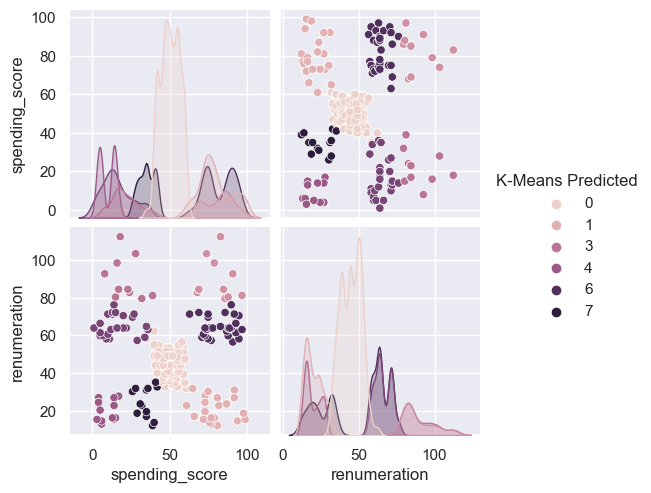

In [182]:
# Use eight clusters.
f = x
kmeans_5 = KMeans(n_clusters=8,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(f)

clusters_5 = kmeans_5.labels_

f['K-Means Predicted'] = clusters_5
# Plot the predicted.
sns.pairplot(f,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
f['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(f.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
f['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

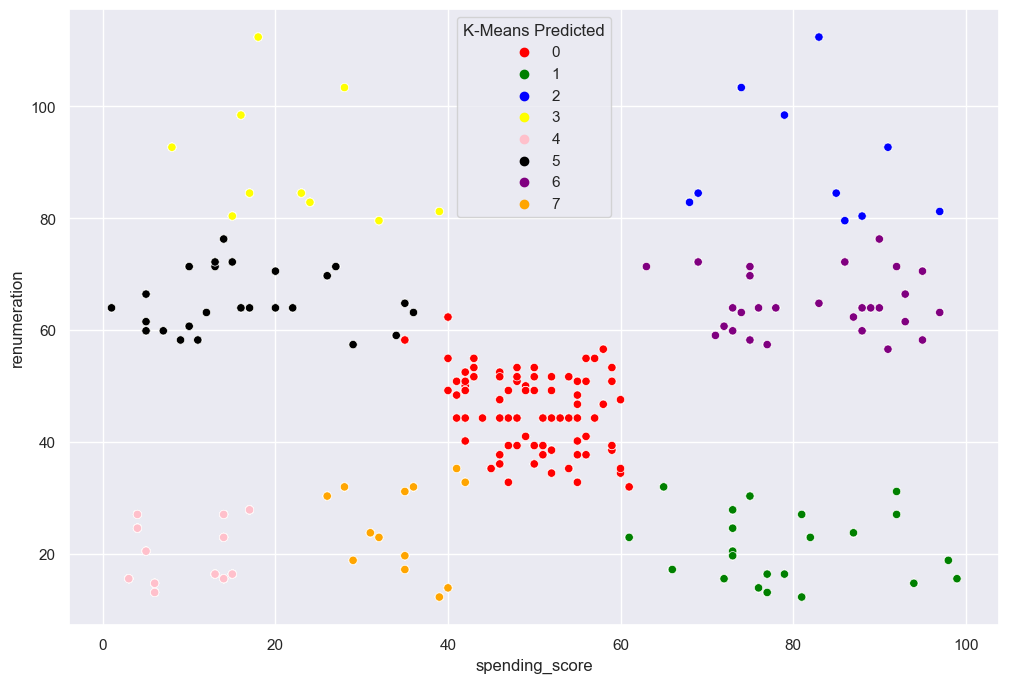

In [183]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=f,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink', 'black', 'purple', 'orange'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  6
1              81         12.30                  4
2               6         13.12                  0
3              77         13.12                  4
4              40         13.94                  6


1    395
8    378
4    246
5    238
7    192
6    156
0    154
2    123
3    118
Name: K-Means Predicted, dtype: int64

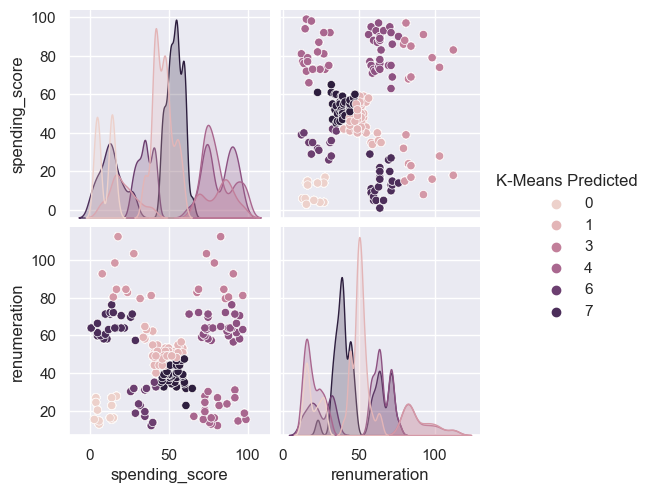

In [184]:
# Use nine clusters.
g = x
kmeans_6 = KMeans(n_clusters=9,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(g)

clusters_6 = kmeans_6.labels_

g['K-Means Predicted'] = clusters_6
# Plot the predicted.
sns.pairplot(g,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
g['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(g.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
g['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

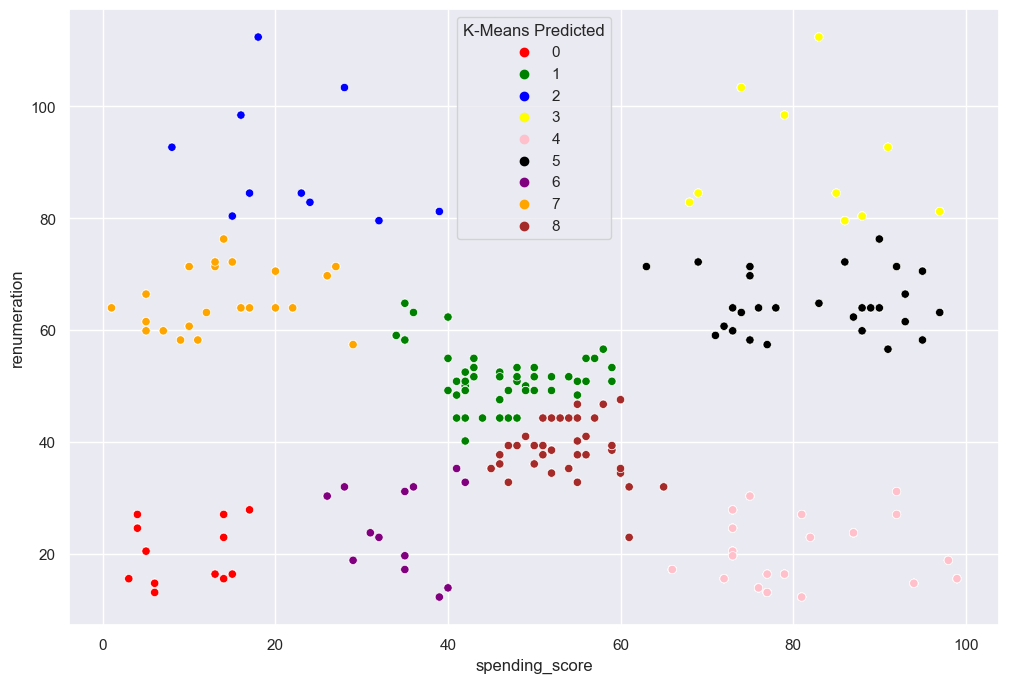

In [185]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=g,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink', 'black', 'purple', 'orange', 'brown'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  3
2               6         13.12                  6
3              77         13.12                  3
4              40         13.94                  1


7    395
4    378
3    246
0    192
2    157
1    156
6    154
5    123
8    114
9     85
Name: K-Means Predicted, dtype: int64

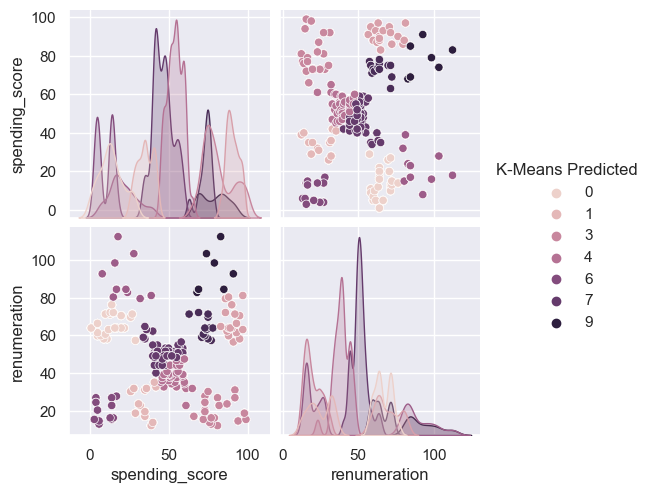

In [186]:
# Use ten clusters.
h = x
kmeans_7 = KMeans(n_clusters=10,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(h)

clusters_7 = kmeans_7.labels_

h['K-Means Predicted'] = clusters_7
# Plot the predicted.
sns.pairplot(h,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
h['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(h.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
h['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

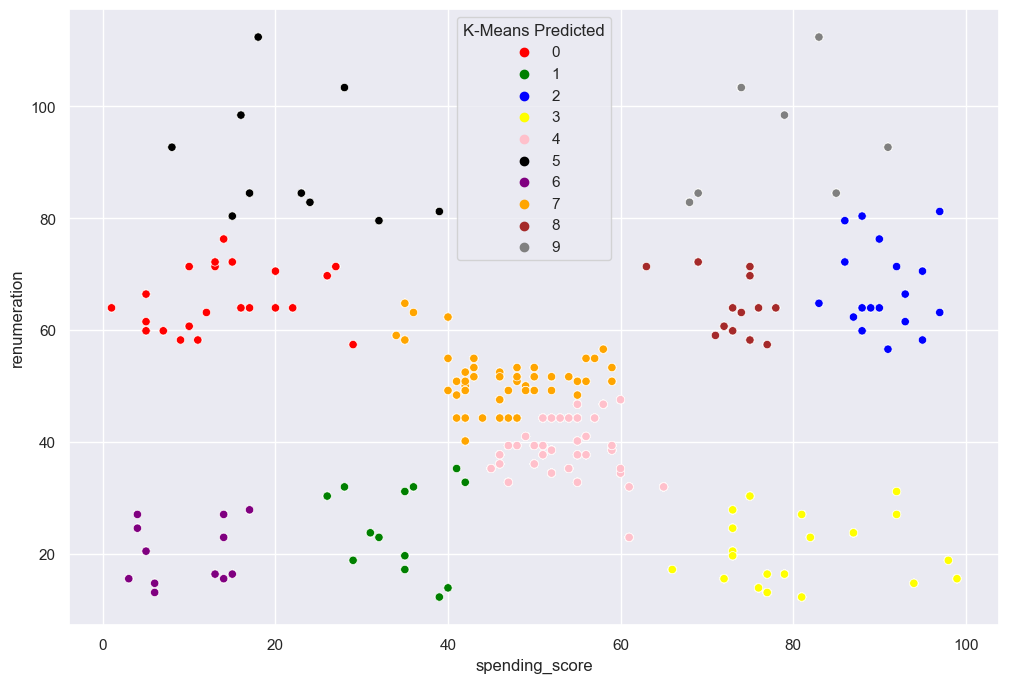

In [187]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=h,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink', 'black', 'purple', 'orange', 'brown', 'grey'])

## 5. Fit final model and justify your choice

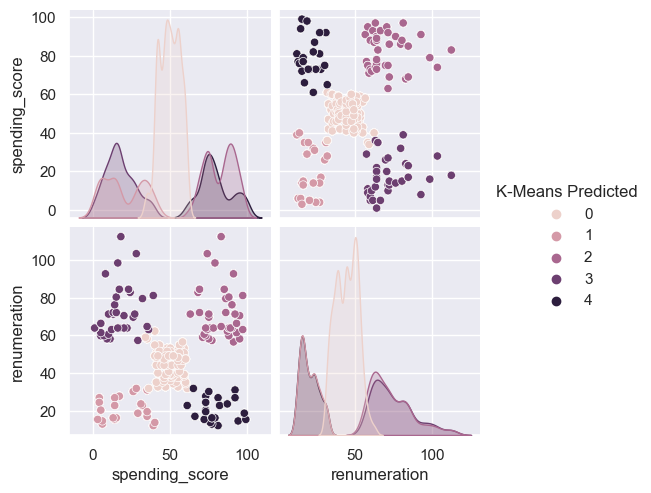

In [193]:
# Apply the final model.
# Plot the predicted.
# Use five clusters.
c = x
kmeans_2 = KMeans(n_clusters=5,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(c)

clusters_2 = kmeans_2.labels_

c['K-Means Predicted'] = clusters_2
# Plot the predicted.
sns.pairplot(c,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [194]:
# Check the number of observations per predicted class.
c['K-Means Predicted'].value_counts()

0    774
2    356
3    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

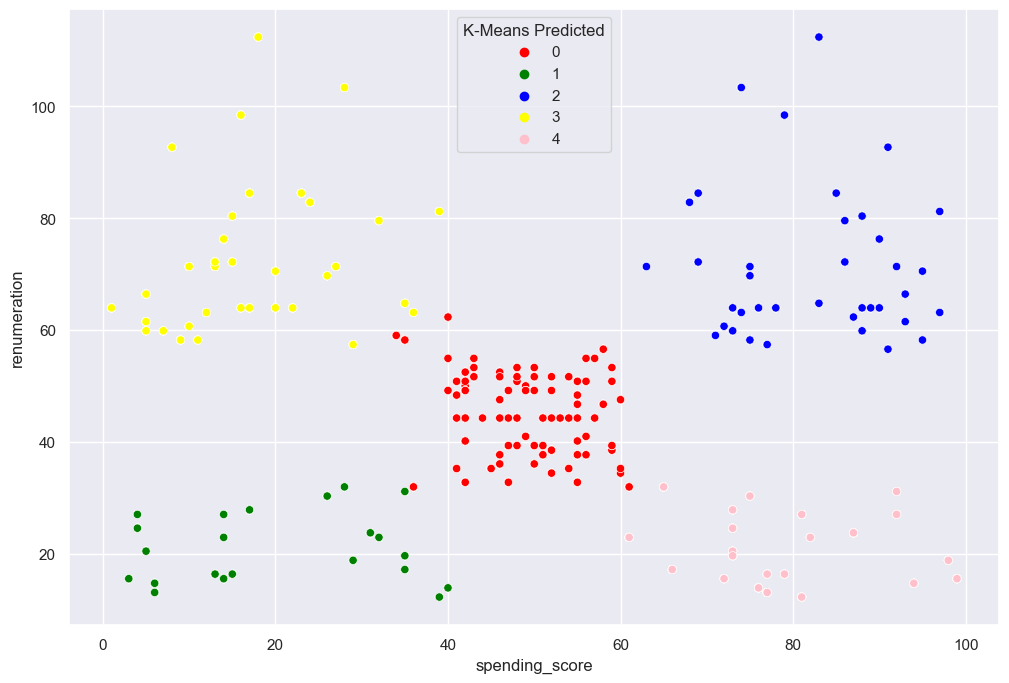

In [195]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=c,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink'])

## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
# Although there were only 5 education types, it seems that k=5 (five clusters) might give the best results (groups). The five education types are closely related (graduate, postgraduate); therefore, Cluster 0 for both k=4, k=5, k=6 is the largest group. The number of predicted values per class indicates a better distribution for k=5 than k=4.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [2]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
!pip install nltk
import nltk 
import os 
import string
import re
import matplotlib.pyplot as plt

# nltk.download('punkt')
# nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
!pip install textblob 
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Install vaderSentiment tool.
!pip install vaderSentiment

# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an object from the class.
sia = SentimentIntensityAnalyzer()

In [3]:
# Load the data set as df3.

df3 = pd.read_csv('reviews.csv')

# View DataFrame.
print(df3.columns)
print(df3.shape)
print(df3.head())
print(df3.tail())

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')
(2000, 9)
   gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

   

In [4]:
# Explore data set.
print(df3.dtypes)

gender             object
age                 int64
renumeration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


In [5]:
# Keep necessary columns. Drop unnecessary columns.

df3 = df3.drop(columns=['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product'])

# View column names.
print(df3.columns)
# View DataFrame.
print(df3)

Index(['review', 'summary'], dtype='object')
                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3             

In [6]:
# Determine if there are any missing values.
print(df3.isnull().sum())

review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [7]:
# Review: Change all to lower case and join with a space.

df3

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [8]:
df3['review'] = df3['review'].astype(str)
df3['review'] = df3.review.str.lower()

In [9]:
df3

review  \
0     when it comes to a dm's screen, the space on t...   
1     an open letter to galeforce9*:\n\nyour unpaint...   
2     nice art, nice printing.  why two panels are f...   
3     amazing buy! bought it as a gift for our new d...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game.  did not think i would like it whe...   
1997  great game for all.........\nkeeps the mind ni...   
1998                                          fun game!   
1999  this game is fun. a lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [10]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].astype(str)
df3['summary'] = df3['summary'].str.lower()
df3

review  \
0     when it comes to a dm's screen, the space on t...   
1     an open letter to galeforce9*:\n\nyour unpaint...   
2     nice art, nice printing.  why two panels are f...   
3     amazing buy! bought it as a gift for our new d...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game.  did not think i would like it whe...   
1997  great game for all.........\nkeeps the mind ni...   
1998                                          fun game!   
1999  this game is fun. a lot like scrabble without ...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995     the perfect word game for mixed ages (with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [11]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].apply(lambda x: x.translate( str.maketrans('', '', string.punctuation) ))
df3['review'] = df3['review'].str.replace('\n', ' ')
# View output.
df3

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9  your unpainted m...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995     the perfect word game for mixed ages (with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

In [12]:
# View output.

In [13]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].apply(lambda x: x.translate( str.maketrans('', '', string.punctuation) ))
df3['summary'] = df3['summary'].str.replace('\n', ' ')
# View output.
df3

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9  your unpainted m...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

### 2c) Drop duplicates in both columns

In [14]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review', 'summary'], keep=False)

# View DataFrame.
df3

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9  your unpainted m...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1940 rows x 2 columns]

## 3. Tokenise and create wordclouds

In [15]:
# Create new DataFrame (copy DataFrame).
# review
df3_r = ' '.join(df3['review'])


# View DataFrame.
df3_r

'when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9  your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could

In [16]:
# Create new DataFrame (copy DataFrame).
# summary
df3_s = ' '.join(df3['summary'])

# View DataFrame.
df3_s

'the fact that 50 of this space is wasted on art and not terribly informative or needed art  another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap five stars best gm screen ever five stars great but could be even better another missed opportunity  not a value add to the product line five stars love the map not a general dm screen very weak game fell completely flat five stars good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a  great buy cant wait to work on this book stained glass perfection four stars so beautiful great pictures very nice five stars 

In [17]:
# Apply tokenisation to both columns.
# review
df3_r_t = word_tokenize(df3_r)



# View DataFrame.
df3_r_t




['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [18]:
# Apply tokenisation to both columns.
# summary

df3_s_t = word_tokenize(df3_s)


# View DataFrame.
df3_s_t



['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [19]:
# Review: Create a word cloud.

# Generate the text
review_text = ' '.join(df3_r_t)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3,contour_color='steelblue', width=700, height=500, scale=1, max_font_size=500, collocations=False)
# Generate a word cloud
wordcloud.generate(review_text)



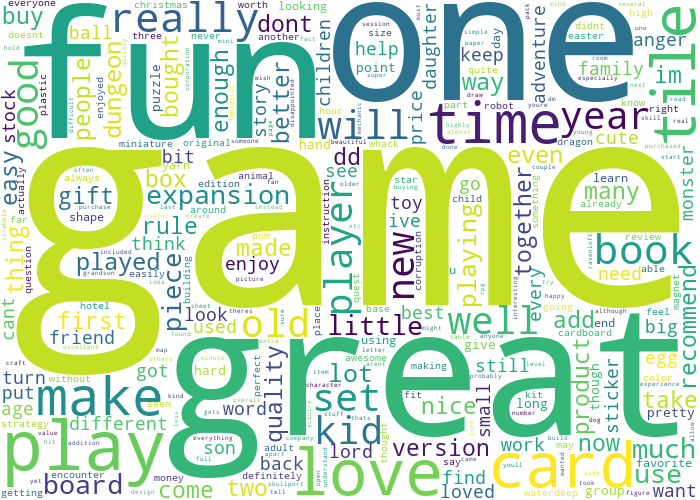

In [20]:
# Review: Plot the WordCloud image.
# Visualize the word cloud
wordcloud.to_image()

In [21]:
# Summary: Create a word cloud.
# Generate the text
summary_text = ' '.join(df3_s_t)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3,contour_color='steelblue', width=700, height=500, scale=1, max_font_size=500, collocations=False)
# Generate a word cloud
wordcloud.generate(summary_text)


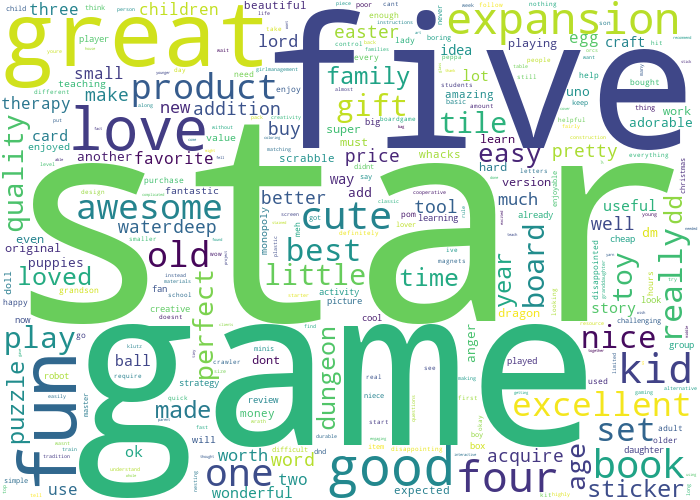

In [22]:
# Summary: Plot the WordCloud image.
# Visualize the word cloud
wordcloud.to_image()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [23]:
# Determine the frequency distribution.
# Review

# Create a frequency distribution object.
freq_dist_of_words_review = FreqDist(df3_r_t)

# Show the five most common elements in the data set.
freq_dist_of_words_review.most_common(15)

[('the', 5450),
 ('and', 3232),
 ('to', 3160),
 ('a', 3159),
 ('of', 2488),
 ('i', 2089),
 ('it', 2081),
 ('is', 1782),
 ('this', 1776),
 ('game', 1663),
 ('for', 1545),
 ('with', 1265),
 ('you', 1177),
 ('in', 1148),
 ('that', 1067)]

In [24]:
# Summary

# Create a frequency distribution object.
freq_dist_of_words_summary = FreqDist(df3_s_t)

# Show the five most common elements in the data set.
freq_dist_of_words_summary.most_common(15)

[('stars', 406),
 ('five', 321),
 ('game', 319),
 ('great', 295),
 ('the', 261),
 ('a', 240),
 ('for', 232),
 ('fun', 218),
 ('to', 192),
 ('and', 168),
 ('it', 150),
 ('of', 139),
 ('this', 135),
 ('is', 103),
 ('love', 93)]

### 4b) Remove alphanumeric characters and stopwords

In [25]:
# Delete all the alpanum.


In [26]:
# Remove all the stopwords
# Removing stopwords
df3_r_t_clean = [word for word in df3_r_t if word not in stopwords]
# Removing stopwords
df3_s_t_clean = [word for word in df3_s_t if word not in stopwords]


### 4c) Create wordcloud without stopwords

In [27]:
# Create a wordcloud without stop words.
# Review

# Generate the text
review_text_c = ' '.join(df3_r_t_clean)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3,contour_color='steelblue', width=700, height=500, scale=1, max_font_size=500, collocations=False)
# Generate a word cloud
wordcloud.generate(review_text_c)

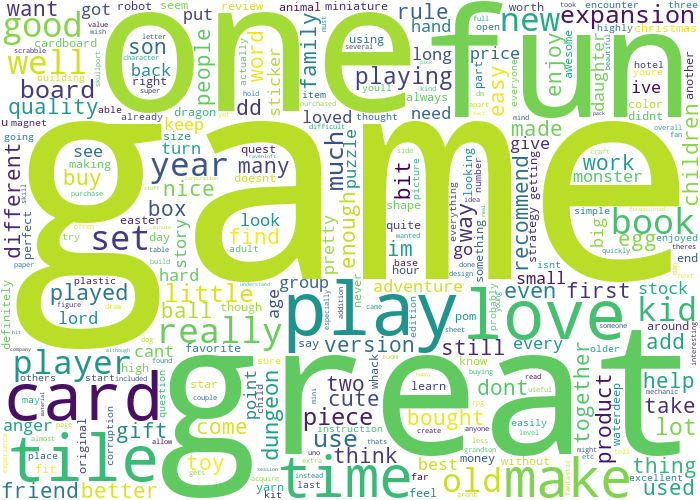

In [28]:
# Plot the wordcloud image.
# Review: Plot the WordCloud image.
# Visualize the word cloud
wordcloud.to_image()

In [29]:
# Summary: Create a word cloud.
# Generate the text
summary_text_c = ' '.join(df3_s_t_clean)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3,contour_color='steelblue', width=700, height=500, scale=1, max_font_size=500, collocations=False)
# Generate a word cloud
wordcloud.generate(summary_text_c)


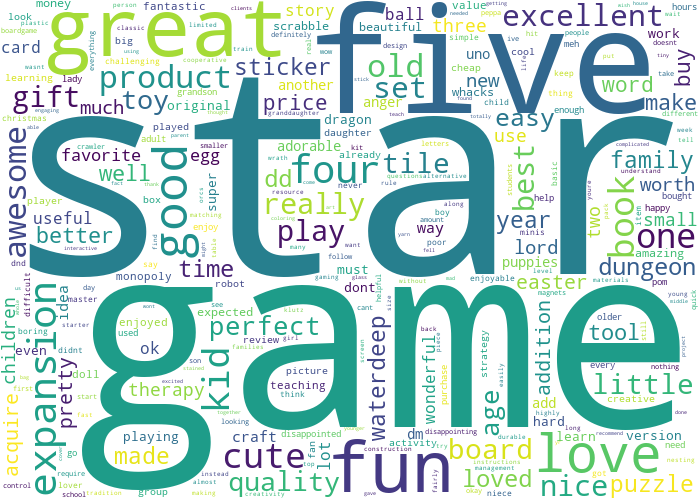

In [30]:
# Plot the wordcloud image.
# Summary: Plot the WordCloud image.
# Visualize the word cloud
wordcloud.to_image()

### 4d) Identify 15 most common words and polarity

In [31]:
# Determine the 15 most common words.

# Review

# Create a frequency distribution object.
freq_dist_of_words_review_c = FreqDist(df3_r_t_clean)

# Show the five most common elements in the data set.
freq_dist_of_words_review_c.most_common(15)


[('game', 1663),
 ('great', 574),
 ('fun', 551),
 ('one', 530),
 ('play', 502),
 ('like', 414),
 ('love', 320),
 ('really', 319),
 ('get', 319),
 ('cards', 301),
 ('tiles', 297),
 ('time', 291),
 ('good', 286),
 ('would', 280),
 ('book', 273)]

In [32]:
# Summary

# Create a frequency distribution object.
freq_dist_of_words_summary_c = FreqDist(df3_s_t_clean)

# Show the five most common elements in the data set.
freq_dist_of_words_summary_c.most_common(15)


[('stars', 406),
 ('five', 321),
 ('game', 319),
 ('great', 295),
 ('fun', 218),
 ('love', 93),
 ('good', 92),
 ('four', 58),
 ('like', 54),
 ('expansion', 52),
 ('kids', 50),
 ('cute', 45),
 ('book', 43),
 ('one', 38),
 ('awesome', 36)]

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [33]:
# Provided function.
sample_reviews = df3
sample_summary = df3


# review
def generate_polarity_r(review):
# '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(review).sentiment.polarity

def calculate_sentiment_r(review):
    # Run VADER on the text
    scores_r = sia.polarity_scores(review)
    # Extract the compound score
    compound_score_r = scores_r['compound']
    # Return compound score
    return compound_score_r
  
def calculate_neg_r(review):
    # Run VADER on the text
    scores_r_neg = sia.polarity_scores(review)    
    # Extract the negative score
    negative_score_r = scores_r_neg['negative']
    # Return negative score
    return negative_score_r

def calculate_pos_r(review):
    # Run VADER on the text
    scores_r_pos = sia.polarity_scores(review)    
    # Extract the positive score
    positive_score_r = scores_r_pos['positive']
    # Return positive score
    return positive_score_r


# summary
def generate_polarity_s(summary):
# '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(summary).sentiment.polarity


def calculate_sentiment_s(summary):
    # Run VADER on the text
    scores_s = sia.polarity_scores(summary)
    # Extract the compound score
    compound_score_s = scores_s['compound']
    # Return compound score
    return compound_score_s

def calculate_neg_s(summary):
    # Run VADER on the text
    scores_s_neg = sia.polarity_scores(summary)    
    # Extract the negative score
    negative_score_s = scores_s_neg['negative']
    # Return negative score
    return negative_score_s

def calculate_pos_s(summary):
    # Run VADER on the text
    scores_s_pos = sia.polarity_scores(summary)    
    # Extract the positive score
    positive_score_s = scores_s_pos['positive']
    # Return positive score
    return positive_score_s




In [37]:
# Determine polarity of both columns.
# View output.

# review
sample_reviews['polarity'] = sample_reviews.review.apply(generate_polarity_r)

# Apply the function to every row in the "text" column and output the results into a new column "sentiment_score"
sample_reviews['sentiment_score'] = sample_reviews['review'].apply(calculate_sentiment_r)

sample_reviews.head()






review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9  your unpainted m...   
2  nice art nice printing  why two panels are fil...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  polarity  \
0  the fact that 50 of this space is wasted on ar... -0.036111   
1  another worthless dungeon masters screen from ...  0.035952   
2                     pretty but also pretty useless  0.116640   
3                                         five stars  0.578788   
4                                         money trap -0.316667   

   sentiment_score  
0          -0.6333  
1           0.9404  
2          -0.8334  
3           0.8860  
4          -0.6808

In [38]:
sample_reviews.describe()

polarity  sentiment_score
count  1940.000000      1940.000000
mean      0.210761         0.643193
std       0.259221         0.392889
min      -1.000000        -0.982800
25%       0.044472         0.535350
50%       0.175000         0.790600
75%       0.350000         0.911025
max       1.000000         0.999600

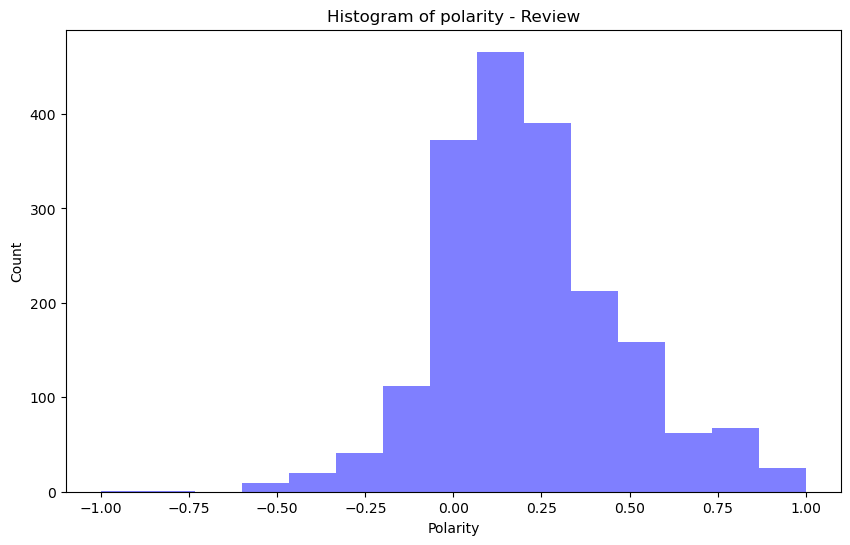

In [39]:
# Review: Create a histogram plot with bins = 15.


sample_reviews.head()
# Histogram of polarity

num_bins = 15
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(sample_reviews.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity - Review')
plt.show();


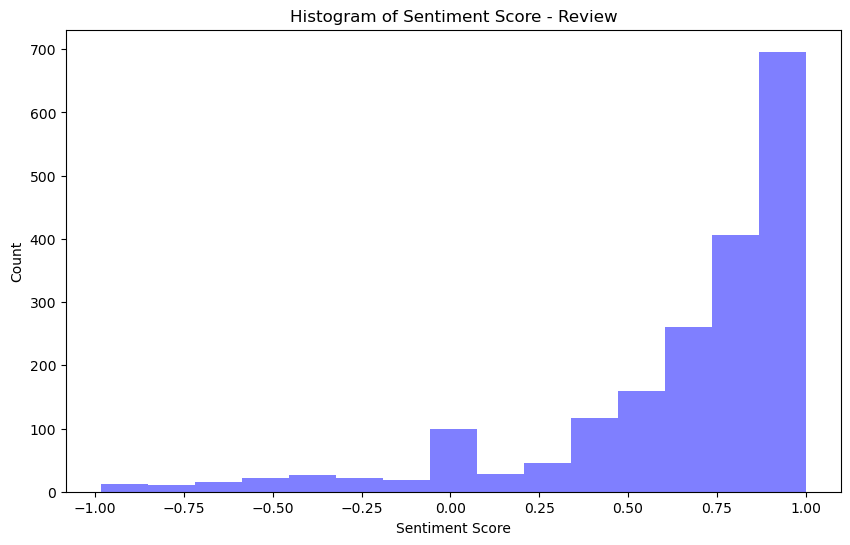

In [40]:
# Histogram of sentiment score

num_bins = 15
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(sample_reviews.sentiment_score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Histogram of Sentiment Score - Review')
plt.show();

In [44]:
# summary
sample_summary['polarity'] = sample_summary.summary.apply(generate_polarity_s)
sample_summary['sentiment_score'] = sample_summary['summary'].apply(calculate_sentiment_s)
sample_summary.head()



review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9  your unpainted m...   
2  nice art nice printing  why two panels are fil...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  polarity  \
0  the fact that 50 of this space is wasted on ar...      0.15   
1  another worthless dungeon masters screen from ...     -0.80   
2                     pretty but also pretty useless      0.00   
3                                         five stars      0.00   
4                                         money trap      0.00   

   sentiment_score  
0          -0.0711  
1          -0.4404  
2           0.4019  
3           0.0000  
4          -0.3182

In [45]:
sample_summary.describe()

polarity  sentiment_score
count  1940.000000      1940.000000
mean      0.226100         0.316243
std       0.338521         0.344831
min      -1.000000        -0.905200
25%       0.000000         0.000000
50%       0.100000         0.440400
75%       0.500000         0.624900
max       1.000000         0.952400

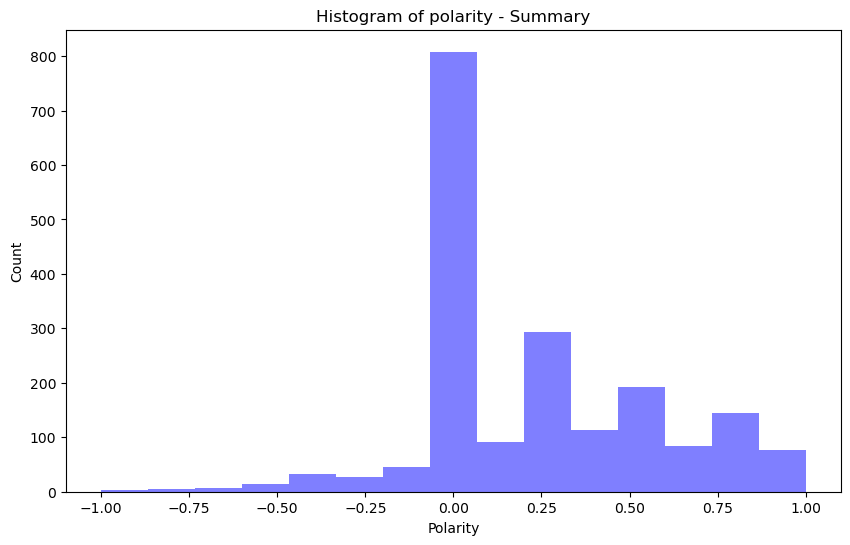

In [42]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

num_bins = 15
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(sample_summary.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity - Summary')
plt.show();


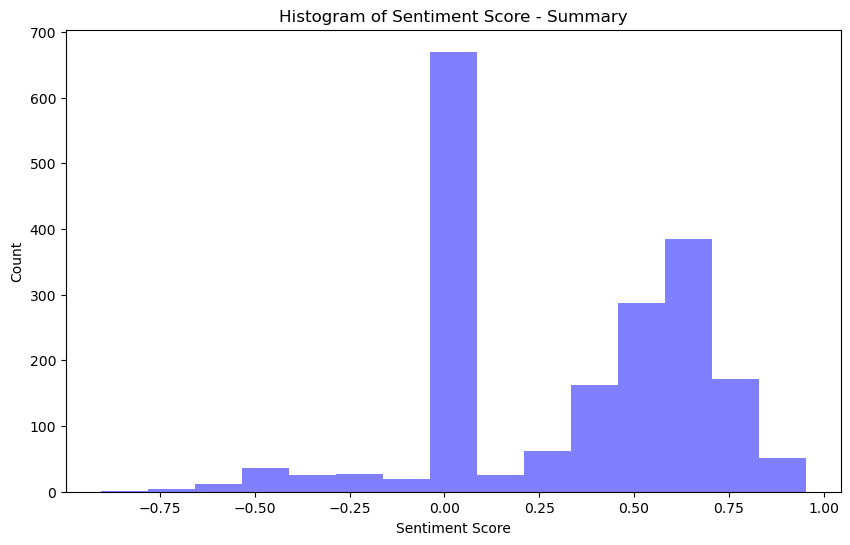

In [43]:
# Histogram of sentiment score

num_bins = 15
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(sample_summary.sentiment_score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Histogram of Sentiment Score - Summary')
plt.show();





## 6. Identify top 20 positive and negative reviews and summaries respectively

In [166]:
# Top 20 negative reviews.
top20_r = sample_reviews.sort_values('sentiment_score').reset_index()


# View output.
print(top20_r.head(20))

    index                                             review  \
0    1119  here is my review crossposted from boardgamege...   
1    1559  the one ring is a very innovative rpg set in m...   
2     281  i bought this thinking it would be really fun ...   
3     459  this is a fun game for kids its basically the ...   
4     882  a crappy cardboard ghost of the original  hard...   
5     899  the game is amazing the new version is not car...   
6    1069  for those just getting started in the dnd worl...   
7    1148  i dig this its a shame that 56 years ago i was...   
8    1797  the ball of whacks can be a valuable tool for ...   
9     347  my 8 yearold granddaughter and i were very fru...   
10    506  its really uno type game but anger control stu...   
11   1670  i thought i was getting a new product but the ...   
12      2  nice art nice printing  why two panels are fil...   
13    363  i found that this card game does the opposite ...   
14    426  its uno with questions about 

In [168]:
# Top 20 negative summaries.
top20_s = sample_summary.sort_values('sentiment_score').reset_index()


# View output.
print(top20_s.head(20))

# View output.


    index                                             review  \
0    1119  here is my review crossposted from boardgamege...   
1    1559  the one ring is a very innovative rpg set in m...   
2     281  i bought this thinking it would be really fun ...   
3     459  this is a fun game for kids its basically the ...   
4     882  a crappy cardboard ghost of the original  hard...   
5     899  the game is amazing the new version is not car...   
6    1069  for those just getting started in the dnd worl...   
7    1148  i dig this its a shame that 56 years ago i was...   
8    1797  the ball of whacks can be a valuable tool for ...   
9     347  my 8 yearold granddaughter and i were very fru...   
10    506  its really uno type game but anger control stu...   
11   1670  i thought i was getting a new product but the ...   
12      2  nice art nice printing  why two panels are fil...   
13    363  i found that this card game does the opposite ...   
14    426  its uno with questions about 

In [167]:
# Top 20 positive reviews.


# View output.
print(top20_r.tail(20))

      index                                             review  \
1920   1112  i just bought this game with my 8 year old son...   
1921    586  we were sooo excited to see the easter story e...   
1922    926  i was skeptical about castle ravenloft despite...   
1923   1810  monopoly is fun but it takes forever to play t...   
1924   1097  i have a wife and kids  i dont have time to be...   
1925   1095  i would recommend this game to any fan of fant...   
1926   1103  who am i middle aged married guy who loves sci...   
1927   1575  doctor who the card game was created by martin...   
1928    928  wrath of ashardalon gets everything right for ...   
1929   1116  the short short version wrath of ashardalon is...   
1930   1073  we own this game as well as castle ravenloft  ...   
1931   1063  if you are a fan of dungeons and dragons or ot...   
1932   1357  lords of waterdeep scoundrels of skullport is ...   
1933   1295  lords of waterdeep was awesome and scoundrels ...   
1934    85

In [169]:
# Top 20 positive summaries.


# View output.
print(top20_s.tail(20))

      index                                             review  \
1920   1112  i just bought this game with my 8 year old son...   
1921    586  we were sooo excited to see the easter story e...   
1922    926  i was skeptical about castle ravenloft despite...   
1923   1810  monopoly is fun but it takes forever to play t...   
1924   1097  i have a wife and kids  i dont have time to be...   
1925   1095  i would recommend this game to any fan of fant...   
1926   1103  who am i middle aged married guy who loves sci...   
1927   1575  doctor who the card game was created by martin...   
1928    928  wrath of ashardalon gets everything right for ...   
1929   1116  the short short version wrath of ashardalon is...   
1930   1073  we own this game as well as castle ravenloft  ...   
1931   1063  if you are a fan of dungeons and dragons or ot...   
1932   1357  lords of waterdeep scoundrels of skullport is ...   
1933   1295  lords of waterdeep was awesome and scoundrels ...   
1934    85

## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
;

In [132]:
# Apply sentiment analysis. - Review
for sentence in df3['review']:
 score = sia.polarity_scores(sentence)['compound']
 print(f'The sentiment value of the sentence :"{sentence}" is : {score}')
 # If you insert this line of code, you will have a line break between the outputs.
 print("="*50)

The sentiment value of the sentence :"when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely" is : -0.6333
The sentiment value of the sentence :"an open letter to galeforce9  your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i mas

The sentiment value of the sentence :"we were sooo excited to see the easter story egg come out this year  we were given the star from afar a few years ago from my inlaws and have loved adding that tradition to our family christmas celebration we have bought it as gifts for others as it has really helped us teach our kids the true meaning of christmas and focus on jesus during the busy holiday season the easter story egg does not disappoint  there is no doubt it will be a fun way to help us keep jesus at the heart of our easter celebrations as well  we just got our nesting eggs and book a few days ago and our kids ages 5 3 and even the 1 year old couldnt have been more excited  it was so fun for them to pull apart the eggs a little difficult for them to open and close at first but as promised much easier to for them to do after a few days of playing with them they seem to be holding up well to their semirough handling as they are solid wood though i have tried to the limit the play so 

The sentiment value of the sentence :"i grew up playing monopoly  lots of people did  its unfortunate because there was this gem just sitting there begging to be played but passed over  heres what was missed  theme the game is about buying and selling stock in hotel chains causing chains to merge and go in and out of business  given that virtually none of this is represented visually and it looks more like a bingo board the theme really stands out  you really feel like youre doing exactly what the game says you are  components this is where the game takes a hit  if you can see if you can pick up one of the versions from the 1960s or 1970s  those were very well made and as long as you dont need them to be in perfect shape can be come across for very little  if you can get one of those the components are perfectly good  gameplay you have a handful of tiles marked like a bingo board and one central bingo board  every turn you play a tile to the corresponding spot on the board  if it is ad

The sentiment value of the sentence :"wrath of ashardalon gets everything right for a dungeon crawl board game ill break down all of the great highlights  setup  you divide out cards and characters you put a start tile down then youre ready to go super easy and fast  rules  if you are familiar with playing dungeons and dragons then youll know that an encounter can often take more than an hour not so here  the rules have been laid out to make encounters very brief and you wont feel cheated all of the rolls are with 20sided dice damage is 1 2 or 3 hit points almost everything has between 112 hit points so creature die fast  each player adds more of a challenge so if you solo its just as hard as with 5 people more or less  i think its just a tad harder with more people so as you add more people their ability to play their role becomes crucial fighters fight clerics heal wizards blast from afar etc  the rules roughly follow the 40 version of the dungeons and dragons rules you have daily ut

The sentiment value of the sentence :"we own this game as well as castle ravenloft  once we adjusted to the scant rulebook in cr it was very alarming to make up house rules when we were new to the genre we found the game to be fun and engaging and it made sense to try out the second version  woa shows some obvious improvements over cr  we found that the health and monsters are balanced better though its hard to put my finger on exactly what changed to make it so  however in cr we basically always had to add a house rule for possible health drops after defeating an enemy we would roll the d20 to determine whether health would or would not drop and then again for how much  in woa we dont have to do that and we still win often enough to make the game fun and not just punishment  now that we have played real dd this game feels a little bit weaker  i see now the depth that im missing here and its true that actual role playing is hard  however i dont think its fair to blame this game for bei

The sentiment value of the sentence :"this game has grat mechanics i think many get it expecting to have the kind of experience you have within the standard dd rpg but this is a board game albeit the play is great but there is just so much you can do with randomization thats randomizing tiles treasures etc  all these cards are not as awful as several people have said in negative comments it uses actual 4th edition dd and it plays well for people who just want a casual night of gaming with family andor friends its nothing extravagant but it will keep you in dd without having to be a dmdungeon master that is plus for me since i have been a dm all of my life and never had others who could dm but once or twice  so yea if you love good boardgames that the family can enjoy or just to have a casual night of gaming this is the game for you  i would suggest watching rodney smiths watch it played series on this game which he has on youtubecom you can see it taken out of the box set up and played

The sentiment value of the sentence :"disclaimer bought this from a local store paid list value but supporting local game stores helps keep them in business and its a rough market to keep a gaming store running also i do not own nor have i playednbspa datahookproductlinklinked classalinknormal hrefdungeonsdragonscastleravenloftboardgamedp0786955570refcmcrarpdrvwtxtieutf8dungeons  dragons castle ravenloft board gamea the first dd adventures board game regardless  dungeons  dragons wrath of ashardalon board game woa is a fantastic value at 65 list you get 42 plastic unpainted minis 1 scale you get a nice set of cardboard interlocking dungeon tiles and you get a fun very random board game playable either by yourself or with up to 4 friends  what it is woa is in gamer terms a roguelike in tabletop form in laymans terms woa is a dungeon crawler you start at the entrance and have a specific goal rescue the villagers survive the dungeon destroy the altar slay the dragon the adventures are bui

The sentiment value of the sentence :"lords of waterdeep was awesome and scoundrels of skullport makes it even bigger better and crazier like the original game on steroids you get two expansions in one undermountain and skullport both feature 3 new lord cards 3 new basic building locations each on a separate small game board a ton of new buyable buildings plus a huge amount of new quest and intrigue cards skullport includes a corruption mechanic that penalizes your endgame points by the number of corruption tokens blue skulls you have vs how many remain on the included corruption track also on a small game board you gain corruption by using the awesome new buildings or completing some of the crazy new quests corruption is easy to gain but hard to get rid of ask any politician lol but the game includes a number of ways to get rid of it a bit at a time such as through using certain buildings completing certain quests or playing certain intrigue cards corruption management is vital dont w

The sentiment value of the sentence :"doctor who the card game was created by martin wallace and is published by cubicle 7 entertainment the first edition of this game focused more on the adventures of the eleventh doctor while the second edition that we purchased covers the ninth tenth and eleventh incarnations of the doctor the game supports 34 players  the game has players play the role of the doctor and his companions as they try and defend the earth from a whole range of alien adversaries as seen on the show all players start with a location card that represents a place that is in need of defending and each location has a declared point value that will come into play at the end of the game  players will have a mix of good and bad cards that can be used to defend your locations or to attack other locations so while you are focused on playing more valuable locations and seeding them with defense cards you also have a chance to put rival locations under threat so in this respect play

The sentiment value of the sentence :"i was excited to get this based on the reviews but i found the toy more inhibitive than expected the odd shape of the blocks combined with the limited amount only allow a couple different arrangements all tending more or less toward a balllike design things like the frog in the picture are about the most you can spread it out but it will be too fragile to touch at that point i felt like this could have been cool but the pieces just arent as flexible as i would like such as legos this was not worth the money to me" is : 0.3741
The sentiment value of the sentence :"this game is a winner i ordered this game months ago just from the description having never heard of it weve given it as a gift to numerous people and now friends and family members also find it a favorite and are buying it for others have a dictionary on handtheres always someone who comes up with a word youve never heard ofand someone else raising his or her eyebrows fans range in age fr

In [150]:
# Calculate the percentage of the output. - Review
for sentence in df3['review']:
 print(f'For the sentence "{sentence}"')
 # Calculate the scores.
 polarity = sia.polarity_scores(sentence)
 pos = polarity['pos']
 neu = polarity['neu']
 neg = polarity['neg']
 
 # Display the scores.
 print(f'The percentage of positive sentiment in :"{sentence}" is : {round(pos*100,2)} %')
 print(f'The percentage of neutral sentiment in :"{sentence}" is : {round(neu*100,2)} %')
 print(f'The percentage of negative sentiment in :"{sentence}" is : {round(neg*100,2)} %')
 print("="*50)

For the sentence "when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely"
The percentage of positive sentiment in :"when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely" is : 5.6 %
The percentage of neutral sentiment in :"when it comes to a dms screen the space on the screen itself is at an absolute

The percentage of positive sentiment in :"we had received the star from afar set a few years ago and love being able to share the true meaning of important holidays with our girls on a level they can relate to  when we saw the easter story egg come out we knew we wanted to purchase so we could explain the true meaning of easter as well  the eggs are well made the wood is smooth and good quality without splinters the painted images on each one were nice and vibrant the eggs themselves are a good size as well easy for an adult to hold and my 4yr old had no issues  the book we received is good quality as well no binding issues like another reviewer mentioned  the packaging for this product is great as well it all stores nicely in the box when not in use throughout the year  our girls were very excited to receive it in the mail recently and we cant wait to use it  very pleased with this product" is : 28.7 %
The percentage of neutral sentiment in :"we had received the star from afar set a f

The percentage of positive sentiment in :"whenever i see this game on my shelf i get a disturbing visual of quarks big head from star trek deep space nine i then picture him playing tongo with a bunch of other ferengia game that deals with buying selling acquiring and other things youd normally see on the wall street floor dont ask me whyi havent had my coffee yet this morning  acquire 36 players ages 12 average play time 60 to 90 minutes  note while the box says that the game is for three to six players i dont see why a two player variant couldnt existif one doesnt already im fairly confident that two players with an imagination who are not concerned about following the rulebook to the letter could make do i also came across the older avalon hill versions rulebook and there is a section for special rules for two playersso feel free to experiment  acquire plays a bit differently than the other games ive played the closest comparison i could possibly make to what ive already reviewed is

The percentage of positive sentiment in :"this is a standalone dd themed board game that you can play with 1 to 5 players yes that means you can play the game by yourself and i recommend doing so the first time you play so that you can get a handle of the rules and be in a better position to help others in the future this single player aspect is actually what drew me towards this game i love dd and i love board games but my wife only occasionally plays games so this was something i could play on my own however i was a bit disappointed that in the scenario booklet that comes with the game there is only a single scenario for 1 player all of the others say you need at least two people bummer  that aside the tiles and cards are all excellent quality and i have confidence that theyll hold up well i was truly impressed with this conversely i was a bit disappointed in the figures theyre made of a soft plastic which is fine for the more solid figures but doesnt work so well with things like sw

The percentage of positive sentiment in :"i was attracted to this game and its counterparts castle ravenloft and legend of drizzt mainly because there is a oneplayer option there are plenty of times where id like to play but no one is available to play single or multi player it seems to be a solid game  my only complaints are that the punch out tiles seem to be a bit less of quality when compared to other big box games like descent second edition i noticed when i was punching out the tiles there was a lot of debris on the table maybe a poor cut in the sheet but annoying in any event they also are prone to tearing if you arent careful when taking them out but once they are punched out they seem to be pretty solid the playing cards are also a bit thinner than other games not too big of a deal since most players buy sleeves for all their cards so that i can live with lastly the adventure book and rule book are pretty flimsy  the minis are of great quality and there are a lot of them wizar

The percentage of positive sentiment in :"who am i middle aged married guy who loves sci fi video games and fantasy novels used to play dd and then add around twenty years ago havent been involved with any serious groups since then so i have no experience with any editions of dd that cause such a rift in the community this means that i am not hopelessly in love with any specific edition of dd  note for various dd edition fangirls and fanboys if you are a 4th edition hater and cant get past that you most likely will not enjoy these games as they are based in general on the 4th edition rule set if you dont know what that statement means or if you are capable of enjoying what each edition has to offer you should have no problems  why i love the dd adventure systems castle ravenloftcr wrath of ashardalonwoa and legend of drizztlod they work as a stand alone product and offer a dungeon crawling limited leveling monster slaying experience with no previous knowledge of how dd works and all in

The percentage of positive sentiment in :"disclaimer bought this from a local store paid list value but supporting local game stores helps keep them in business and its a rough market to keep a gaming store running also i do not own nor have i playednbspa datahookproductlinklinked classalinknormal hrefdungeonsdragonscastleravenloftboardgamedp0786955570refcmcrarpdrvwtxtieutf8dungeons  dragons castle ravenloft board gamea the first dd adventures board game regardless  dungeons  dragons wrath of ashardalon board game woa is a fantastic value at 65 list you get 42 plastic unpainted minis 1 scale you get a nice set of cardboard interlocking dungeon tiles and you get a fun very random board game playable either by yourself or with up to 4 friends  what it is woa is in gamer terms a roguelike in tabletop form in laymans terms woa is a dungeon crawler you start at the entrance and have a specific goal rescue the villagers survive the dungeon destroy the altar slay the dragon the adventures are

The percentage of positive sentiment in :"lords of waterdeep was awesome and scoundrels of skullport makes it even bigger better and crazier like the original game on steroids you get two expansions in one undermountain and skullport both feature 3 new lord cards 3 new basic building locations each on a separate small game board a ton of new buyable buildings plus a huge amount of new quest and intrigue cards skullport includes a corruption mechanic that penalizes your endgame points by the number of corruption tokens blue skulls you have vs how many remain on the included corruption track also on a small game board you gain corruption by using the awesome new buildings or completing some of the crazy new quests corruption is easy to gain but hard to get rid of ask any politician lol but the game includes a number of ways to get rid of it a bit at a time such as through using certain buildings completing certain quests or playing certain intrigue cards corruption management is vital do

The percentage of positive sentiment in :"as a dad of two boys im always on the lookout for activities for us to do together  something we can all enjoy and equally get into  we built a da vinci catapult a siege tower did some exploring with microscopes geocaching etc with varying degrees of interest in one of the two boys  dont get me wrong we all had fun but it was more for one or the other depending on the activity  my older son since the day he could has loved to talk  he loves to tell stories about things hes done things hed like to do or things hes watched  if he can make a story out of something he will  my younger son has since i can remember loved to play board games  there are ones he likes more than others but i dont think weve played a game he didnt like  i recently became aware of a cardboard game by a company out of the uk named cubicle7  the game is called hobbit tales from the green dragon inn and it looked very interesting  cubicle7 also makes a rpg that takes place in

The percentage of positive sentiment in :"we leave this out and about for visitors and ourselves to play with mindlessly it is a great little conversation piece  made well definitely recommend" is : 40.6 %
The percentage of neutral sentiment in :"we leave this out and about for visitors and ourselves to play with mindlessly it is a great little conversation piece  made well definitely recommend" is : 55.9 %
The percentage of negative sentiment in :"we leave this out and about for visitors and ourselves to play with mindlessly it is a great little conversation piece  made well definitely recommend" is : 3.5 %
For the sentence "not bad for couple days after that my kids lost interest now they lost some parts anyway its ok for a week or two for kids  every piece was functioning good i mean magnetic"
The percentage of positive sentiment in :"not bad for couple days after that my kids lost interest now they lost some parts anyway its ok for a week or two for kids  every piece was functionin

In [134]:
# Apply sentiment analysis. - Summary
for sentence in df3['summary']:
 score_ss = sia.polarity_scores(sentence)['compound']
 print(f'The sentiment value of the sentence :"{sentence}" is : {score_ss}')
 # If you insert this line of code, you will have a line break between the outputs.
 print("="*50)

The sentiment value of the sentence :"the fact that 50 of this space is wasted on art and not terribly informative or needed art " is : -0.0711
The sentiment value of the sentence :"another worthless dungeon masters screen from galeforce9" is : -0.4404
The sentiment value of the sentence :"pretty but also pretty useless" is : 0.4019
The sentiment value of the sentence :"five stars" is : 0.0
The sentiment value of the sentence :"money trap" is : -0.3182
The sentiment value of the sentence :"five stars" is : 0.0
The sentiment value of the sentence :"best gm screen ever" is : 0.6369
The sentiment value of the sentence :"five stars" is : 0.0
The sentiment value of the sentence :"great but could be even better" is : 0.7506
The sentiment value of the sentence :"another missed opportunity  not a value add to the product line" is : -0.1119
The sentiment value of the sentence :"five stars" is : 0.0
The sentiment value of the sentence :"love the map" is : 0.6369
The sentiment value of the senten

In [151]:
for sentence in df3['summary']:
 print(f'For the sentence "{sentence}"')
 # Calculate the scores.
 polarity = sia.polarity_scores(sentence)
 pos = polarity['pos']
 neu = polarity['neu']
 neg = polarity['neg']
 
 # Display the scores.
 print(f'The percentage of positive sentiment in :"{sentence}" is : {round(pos*100,2)} %')
 print(f'The percentage of neutral sentiment in :"{sentence}" is : {round(neu*100,2)} %')
 print(f'The percentage of negative sentiment in :"{sentence}" is : {round(neg*100,2)} %')
 print("="*50)

For the sentence "the fact that 50 of this space is wasted on art and not terribly informative or needed art "
The percentage of positive sentiment in :"the fact that 50 of this space is wasted on art and not terribly informative or needed art " is : 13.2 %
The percentage of neutral sentiment in :"the fact that 50 of this space is wasted on art and not terribly informative or needed art " is : 72.3 %
The percentage of negative sentiment in :"the fact that 50 of this space is wasted on art and not terribly informative or needed art " is : 14.5 %
For the sentence "another worthless dungeon masters screen from galeforce9"
The percentage of positive sentiment in :"another worthless dungeon masters screen from galeforce9" is : 0.0 %
The percentage of neutral sentiment in :"another worthless dungeon masters screen from galeforce9" is : 67.4 %
The percentage of negative sentiment in :"another worthless dungeon masters screen from galeforce9" is : 32.6 %
For the sentence "pretty but also prett

# 